# Perkenalan

**Final Project**

Batch   : RMT - 034

Objective   : Notebook ini berisi model training time series yang digunakan pada pembuatan project UJatim khusus untuk udang size 70.

# Library

In [4]:
# Libary untuk proses Data
import numpy as np
import pandas as pd
import pickle

# Library untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

# Library Model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Library Metriks
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

`Library` yang digunakan untuk proses pembuatan model predict

# Data Loading

In [5]:
df_ori = pd.read_csv("shrimp_prices_week.csv")
df_ori

,date,size_30,size_40,size_50,size_60,size_70,size_80,size_100,province_id
0,2018-12-09,85833.333333,73500.000000,64000.000000,60500.000000,57000.000000,54000.000000,48000.000000,35.0
1,2018-12-16,85333.333333,78000.000000,71000.000000,58000.000000,55000.000000,52000.000000,46000.000000,35.0
2,2018-12-23,85000.000000,75000.000000,65000.000000,62000.000000,59000.000000,56000.000000,50000.000000,35.0
3,2018-12-30,91000.000000,81000.000000,68000.000000,65000.000000,62000.000000,59000.000000,53000.000000,35.0
4,2019-01-06,93000.000000,83000.000000,69000.000000,66000.000000,63000.000000,60000.000000,55000.000000,35.0
...,...,...,...,...,...,...,...,...,...
298,2024-08-25,80000.000000,75000.000000,67514.150943,65000.000000,61028.301887,59028.301887,51509.915094,35.0
299,2024-09-01,83846.153846,76538.461538,69307.692308,65769.230769,62307.692308,59538.461538,53769.230769,35.0
300,2024-09-08,80000.000000,74000.000000,68000.000000,66000.000000,62000.000000,60000.000000,54000.000000,35.0
301,2024-09-15,79000.000000,74000.000000,68000.000000,66000.000000,62000.000000,60000.000000,54000.000000,35.0


data berhasil di load kedalam df_ori

# Data Cleaning

In [6]:
df_70 = df_ori[['date','size_70']]
df_70

,date,size_70
0,2018-12-09,57000.000000
1,2018-12-16,55000.000000
2,2018-12-23,59000.000000
3,2018-12-30,62000.000000
4,2019-01-06,63000.000000
...,...,...
298,2024-08-25,61028.301887
299,2024-09-01,62307.692308
300,2024-09-08,62000.000000
301,2024-09-15,62000.000000


Pengurangan jumlah kolom yang digunakan menjadi hanya 1 yaitu kolom harga udang size 70 saja

In [7]:
df_70 = df_70.rename(columns={"date":"Week"})

merubah nama kolom date menjadi week

In [8]:
df_70['Week'] = pd.to_datetime(df_70['Week'])
df_70.set_index('Week',inplace=True)
df_70.head()

,size_70
Week,
2018-12-09,57000.0
2018-12-16,55000.0
2018-12-23,59000.0
2018-12-30,62000.0
2019-01-06,63000.0


merubah kolom week menjadi index

# EDA

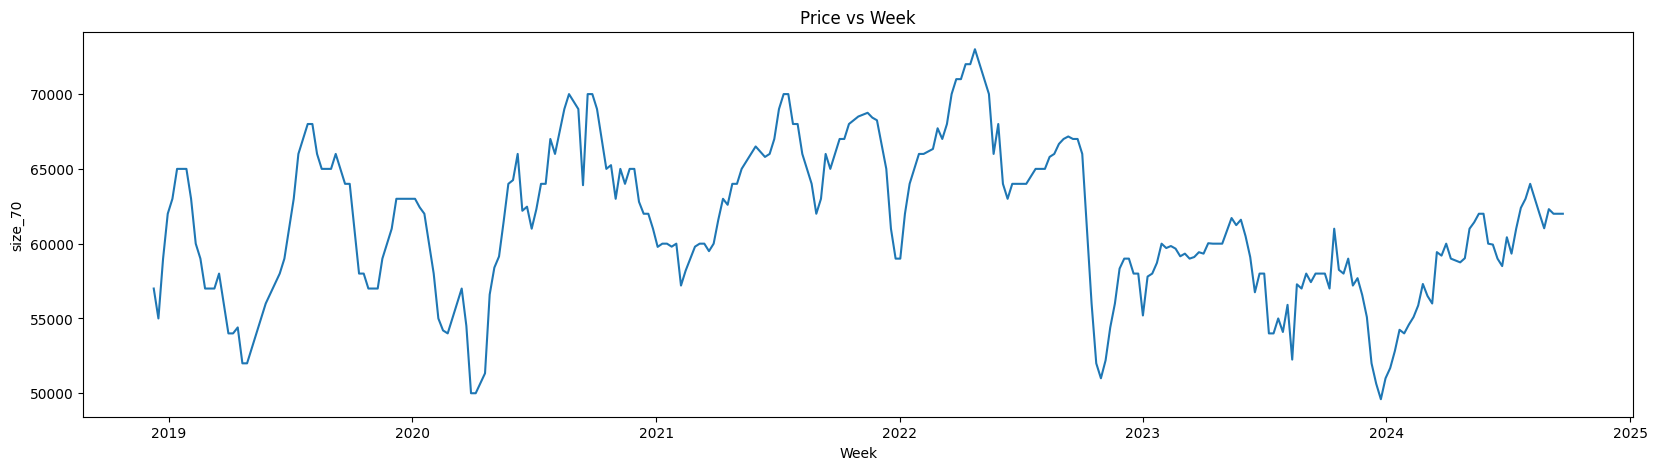

In [9]:
# Visualisasi data
fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df_70.index ,y = 'size_70',data = df_70)
plt.title('Price vs Week');

Grafik Harga Udang size 70 pertahun mulai dari pertengahan tahun 2018 hingga pertengahan tahun 2024 dilihat dari grafik pertahun harga udang mengalami penurunan dan mengalami harga paling rendah di awal tahun 2020 dan akhir tahun 2023 namun tiap tahun harga udang tidak mengalami adanya tren

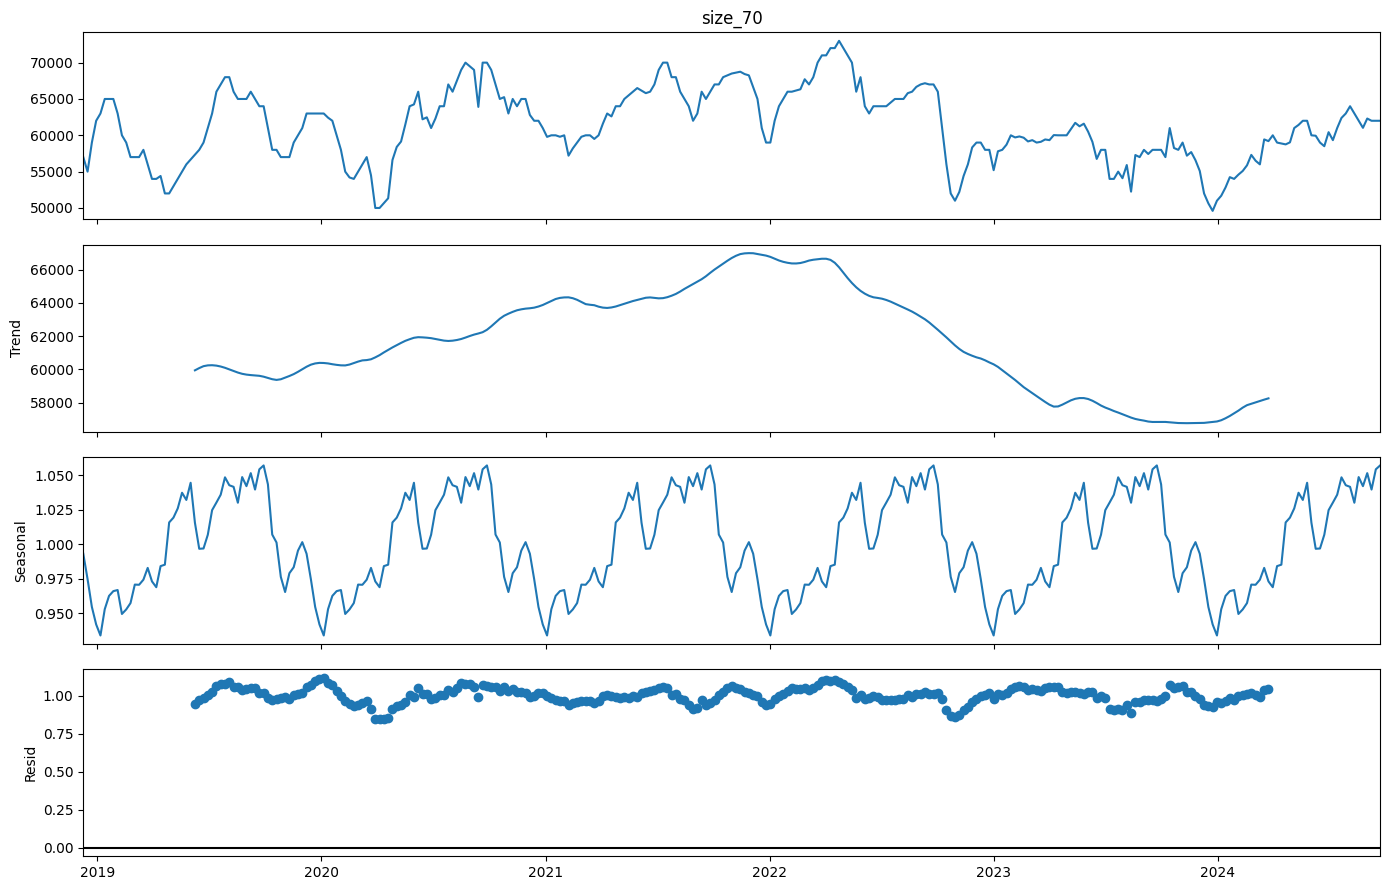

In [10]:
# Dekomposisi timeseries

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(df_70['size_70'], model='multiplicatif')
ax=res.plot()
plt.show()

* Grafik pertama menunjukkan keseluruhan data harga size 70 dari tahun 2019 hingga 2024. Data ini menggabungkan semua faktor tren, musiman, dan residu (noise).
* Grafik kedua menampilkan komponen tren dari harga size 70. Tren ini menunjukkan pergerakan umum harga udang dalam jangka panjang. Dari grafik ini terlihat bahwa harga udang mengalami kenaikan dari tahun 2019 hingga 2022, kemudian mengalami penurunan yang cukup stabil hingga 2023, dan ada sedikit kenaikan di akhir 2023 hingga awal 2024.
* Grafik ketiga memperlihatkan pola musiman, yaitu variasi harga yang terjadi secara berulang setiap tahun. Dari grafik ini, kita bisa melihat bahwa ada pola musiman yang jelas, dengan fluktuasi harga yang berulang setiap tahun, mengindikasikan bahwa harga udang dipengaruhi oleh faktor musiman seperti panen, cuaca, atau permintaan pasar.
* Grafik keempat menunjukkan komponen residu yang relatif stabil namun menunjukkan beberapa fluktuasi, terutama di beberapa titik selama 2020-2023.

## Stationarity

cek stationarity data untuk melihat apakah nilai statitistik dari data sudah konstan atau belum

In [11]:
# fungsi untuk memeriksa stationarity data

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [12]:
# Proses check stationarity
check_stationarity(df_70['size_70'])

ADF Statistic: -3.475958
p-value: 0.008626
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Stationary


Data sudah stationer untuk size 70, tidak perlu dilakukan differencing

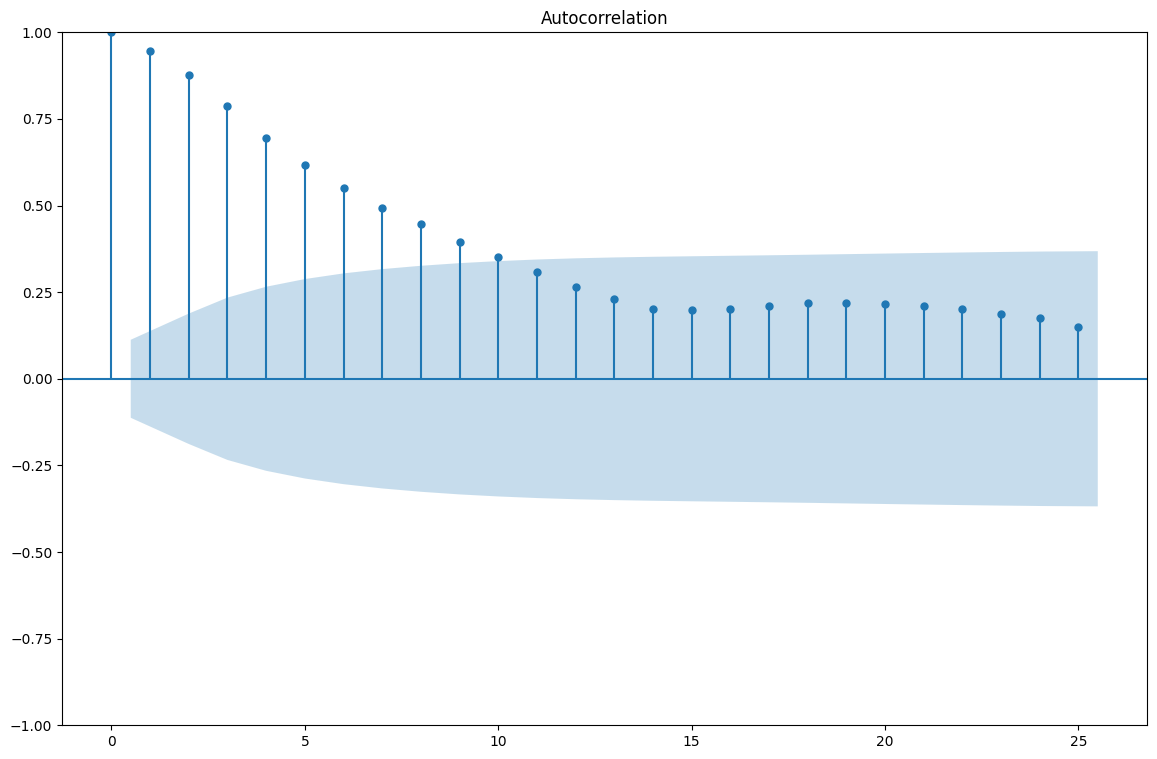

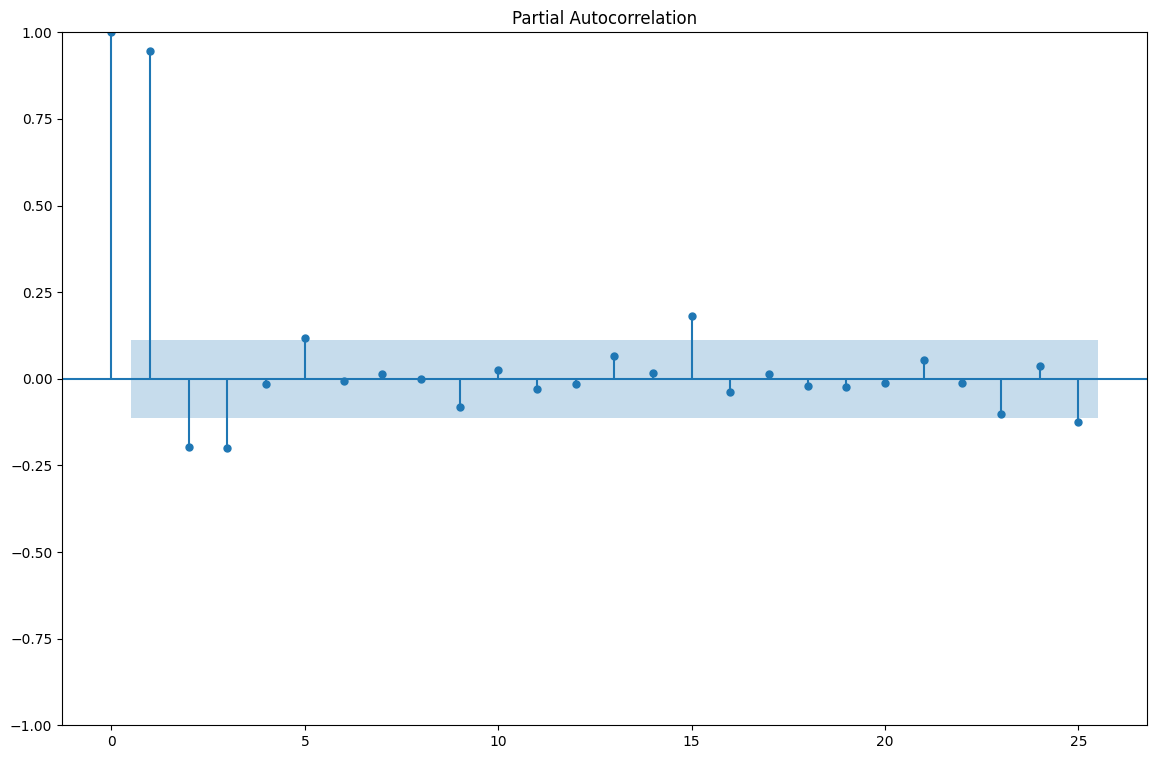

In [13]:
# Visualisasi Plot ACF & PACF

plot_acf(df_70['size_70'])
plot_pacf(df_70['size_70'])
plt.show()

didapatkan nilai P= 5 D =0 Q = 9 berdasarkan visualisasi acf dan pacf, namun nilai ini hanya berdasarkan obesrvasi visual saja akan dilakukan pencarian kombinasi terbaik sebelum dilakukan modeling.

In [14]:
model_arima_visual = ARIMA(df_70['size_70'], order=(5, 0, 9))
result_model_arima_visual = model_arima_visual.fit()

print('The AIC is ', result_model_arima_visual.aic)

The AIC is  5308.295715639912


aic yang didapat dengan menggunakan P = 5 D = 0 Q = 9 adalah 5308

# Modeling

modeling akan dilakukan menggunakan arima dan sarima, kedua model akan dibandingkan menggunakan nilai MAE, RMSE dan MAPE mana yang paling kecil. model terbaik akan dilakukan disimpan dan digunakan untuk prediksi lebih lanjut 

## ARIMA

In [19]:
train = df_70[:243]
test = df_70[243:]
print(f"Train Size : {train.shape}")
print(f"Test Size : {test.shape}")

Train Size : (243, 1)
Test Size : (60, 1)


jumlah data dibagi menjadi train sebanyak 243 dan test sebanyak 60

In [2]:
# Membuat fungsi untuk mencari best model berdasarkan ARIMA

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

pembuatan fungsi pencarian best model

In [20]:
find_best_model(train['size_70'],10,0,10)

(1,
 0,
 3,
 4254.328023442751,
     p  d  q          AIC
 14  1  0  3  4254.328023
 25  2  0  3  4256.243725
 55  5  0  0  4256.265118
 15  1  0  4  4256.299877
 24  2  0  2  4256.364405
 .. .. .. ..          ...
 4   0  0  4  4321.029259
 3   0  0  3  4369.283686
 2   0  0  2  4455.876243
 1   0  0  1  4580.301490
 0   0  0  0  4828.314433
 
 [119 rows x 4 columns])

didapatkan kombinasi nilai p dan q terbaik untuk model adalah pada 1,0,3 dengan nilai aic sebesar 4254

In [21]:
# Menggunakan parameter PDQ dari best model

model_arima = ARIMA(train['size_70'], order=(1,0,3))
result_model_arima = model_arima.fit()

print("AIC ARIMA :",result_model_arima.aic)

AIC ARIMA : 4254.328023442751


melakukan training menggunakan kombinasi terbaik dan mendapatkan hasil aic train sebesar 4254

In [26]:
arima_pred_test = result_model_arima.predict(start="2023-08-06", end="2024-09-22",dynamic=True)
arima_pred_test = pd.DataFrame(arima_pred_test)
arima_pred_test.columns = ['price_predict_arima']

In [27]:
# Concate dengan actual test set
act_vs_pred_ar = pd.concat([test, arima_pred_test],axis=1)
act_vs_pred_ar

,size_70,price_predict_arima
2023-08-06,55909.090909,55119.959654
2023-08-13,52250.000000,54877.183089
2023-08-20,57283.018868,55365.919757
2023-08-27,57000.000000,55455.566338
2023-09-03,58000.000000,55573.610950
2023-09-10,57428.571429,55934.547204
2023-09-17,58000.000000,56387.958953
2023-09-24,58000.000000,57276.653348
2023-10-01,58000.000000,58090.251287
2023-10-08,57000.000000,59186.502080


In [28]:
print('MAE test  : ', mean_absolute_error(test, arima_pred_test))
print('RMSE test : ', np.sqrt(mean_squared_error(test, arima_pred_test)))

MAE test  :  3025.5529874956733
RMSE test :  4105.989014730875


Hasil MAE setelah dilakukan train dengan menggunakan  P = 1 D = 0 Q = 3 MAE sebesar 3025 dan RMSE 4105 artinya besar jumlah error harga dari data aktual dan data test sebesar 3025 ini relatif kecil dengan patokan harga per 1kg udangnya di kisaran 60.000 rupiah

In [31]:
size = int(len(df_70) - 65)
train_v2, test_v2 = df_70['size_70'][0:size], df_70['size_70'][size:len(df_70)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train_v2]
predictions = []

for t in range(len(test_v2)):

    model = ARIMA(history, order=(1,0,3))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = test_v2[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 

predicted = 58144.377462, expected = 58000.000000
predicted = 58785.210946, expected = 54000.000000
predicted = 54015.086987, expected = 54000.000000
predicted = 53511.351002, expected = 55000.000000
predicted = 55482.677181, expected = 54095.238095
predicted = 55238.754079, expected = 55909.090909
predicted = 56828.763249, expected = 52250.000000
predicted = 52230.567230, expected = 57283.018868
predicted = 57746.167894, expected = 57000.000000
predicted = 58375.362251, expected = 58000.000000
predicted = 58947.290917, expected = 57428.571429
predicted = 57461.371401, expected = 58000.000000
predicted = 58120.884841, expected = 58000.000000
predicted = 58449.729727, expected = 58000.000000
predicted = 58422.854538, expected = 57000.000000
predicted = 57131.531128, expected = 61000.000000
predicted = 61441.776078, expected = 58250.000000
predicted = 59112.342980, expected = 58000.000000
predicted = 57816.298709, expected = 59000.000000
predicted

In [32]:
# Menghitung MAPE
mape = np.mean(np.abs((test_v2 - predictions) / test_v2)) * 100

print('MAPE test : ', mape)

MAPE test :  1.925906062210751


besar MAPE test 1.925 yang artinya percentage error harga dari prediksi dan actual hanya 1.9%

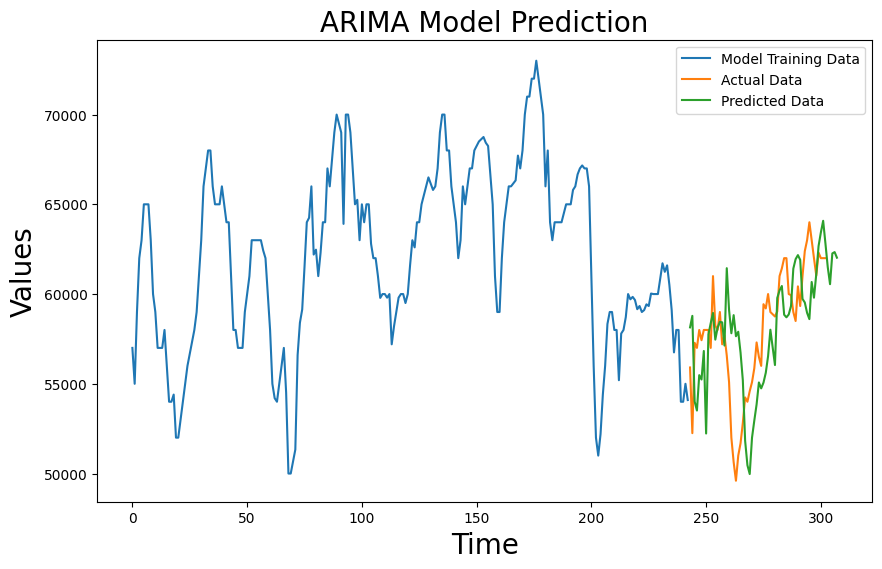

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plot training data
plt.plot(range(len(train)), train, label='Model Training Data')

# Plot actual data (test set)
plt.plot(range(len(train), len(train) + len(test)), test, label='Actual Data')

# Plot predicted data
plt.plot(range(len(train), len(train) + len(predictions)), predictions, label='Predicted Data')

# Add labels and title
plt.xlabel('Time', size=20)
plt.ylabel('Values', size=20)
plt.title('ARIMA Model Prediction', size=20)
plt.legend()

# Show plot
plt.show()

visualiasi Harga udang size 70 yang dilakukan yang test pada data ke 243 hingga data ke 314 dari visualiasi cukup bagus karna harga prediksi tidak begitu jauh dengan harga aktual nya

# SARIMA

In [34]:
# Splitting dataset

train_sar = df_70[:250]
test_sar = df_70[250:]

print('Train size : ', train_sar.shape)
print('Test size : ', test_sar.shape)

Train size :  (250, 1)
Test size :  (53, 1)


Pembagian data train dan data test

In [36]:
# Train using SARIMAX
sar=SARIMAX(train_sar['size_70'], order=(1, 0, 3),seasonal_order=(1, 0, 3, 52)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            size_70   No. Observations:                  250
Model:             SARIMAX(1, 0, 3)x(1, 0, 3, 52)   Log Likelihood               -2198.613
Date:                            Thu, 26 Sep 2024   AIC                           4415.226
Time:                                    09:20:59   BIC                           4446.919
Sample:                                12-09-2018   HQIC                          4427.982
                                     - 09-17-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.003    327.246      0.000       0.993       1.005
ma.L1          0.1539      0.046      3.320      0.001       0.063       0.245
ma.L2          0.2653      0.062      4.310      0.000       0.145       0.386
ma.L3          0.0719      0.061      1.171      0.242      -0.048       0.192
ar.S.L52       0.0317     36.553      0.001      0.999     -71.611      71.674
ma.S.L52       0.0311     36.554      0.001      0.999     -71.614      71.676
ma.S.L104      0.0445      2.313      0.019      0.985      -4.489       4.578
ma.S.L156      0.0043      1.723      0.002      0.998      -3.374       3.382
sigma2       2.44e+06      0.002   1.07e+09      0.000    2.44e+06    2.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                69.57
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.04
Prob(H) (two-sided):                  0.94   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.62e+24. Standard errors may be unstable.
"""

AIC yang didapat setelah dilakukan modeling menggunakan sarimax didapat aic 4415

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict test-set
# Change the end date to match the length of test_sar
sar_pred_test = sar.predict(start="2023-07-02", end="2024-06-25", dynamic=True)
sar_pred_test = pd.DataFrame(sar_pred_test)
sar_pred_test.columns = ['size_70_predict']

# Reset index for alignment
test_sar_reset = test_sar['size_70'].reset_index(drop=True)
sar_pred_test_reset = sar_pred_test['size_70_predict'].reset_index(drop=True)

# Concatenate predictions with actual values
act_vs_pred_sar = pd.concat([test_sar_reset, sar_pred_test_reset], axis=1)

# Check the MAE & RMSE
mae_test = mean_absolute_error(test_sar_reset, sar_pred_test_reset)
rmse_test = np.sqrt(mean_squared_error(test_sar_reset, sar_pred_test_reset))

print('MAE test  : ', mae_test)
print('RMSE test : ', rmse_test)

# Display actual vs predicted
print(act_vs_pred_sar)


MAE test  :  3619.0282425502674
RMSE test :  4351.513844179676
         size_70  size_70_predict
0   58000.000000     57711.840259
1   58000.000000     58065.065863
2   57000.000000     58184.114584
3   61000.000000     58080.161842
4   58250.000000     58031.615658
5   58000.000000     57902.674382
6   59000.000000     57864.382512
7   57200.000000     57786.237770
8   57692.307692     57694.694141
9   56571.428571     57707.747642
10  55090.909091     57799.224908
11  52000.000000     57701.065076
12  50636.363636     57695.560450
13  49600.000000     57633.696237
14  51000.000000     57278.087220
15  51684.210526     56958.569989
16  52823.529412     56672.421522
17  54241.379310     56572.164778
18  54000.000000     56605.293123
19  54588.235294     56696.524902
20  55090.909091     56733.590202
21  55869.565217     56822.730866
22  57304.347826     56743.161330
23  56500.000000     56626.588582
24  56000.000000     56345.660785
25  59434.782609     56212.632053
26  59200.000000   

Hasil dari melatih model terhadap data test didapat MAE sebesar 3619.02 dan RMSE 4351.51

In [38]:
# Menghitung MAPE dengan menangani pembagian dengan nol
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Mengabaikan nilai aktual yang sama dengan nol untuk menghindari pembagian dengan nol
    non_zero_idx = y_true != 0
    y_true_non_zero = y_true[non_zero_idx]
    y_pred_non_zero = y_pred[non_zero_idx]

    # Hitung MAPE hanya pada data yang tidak memiliki nilai aktual nol
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100
    return mape

# Contoh penggunaan
mape_test = mean_absolute_percentage_error(test_sar_reset, sar_pred_test_reset)
print('MAPE test: ', mape_test)


MAPE test:  6.1844442401233675


MAPE test data test dengan predict test sebesar 6.18%

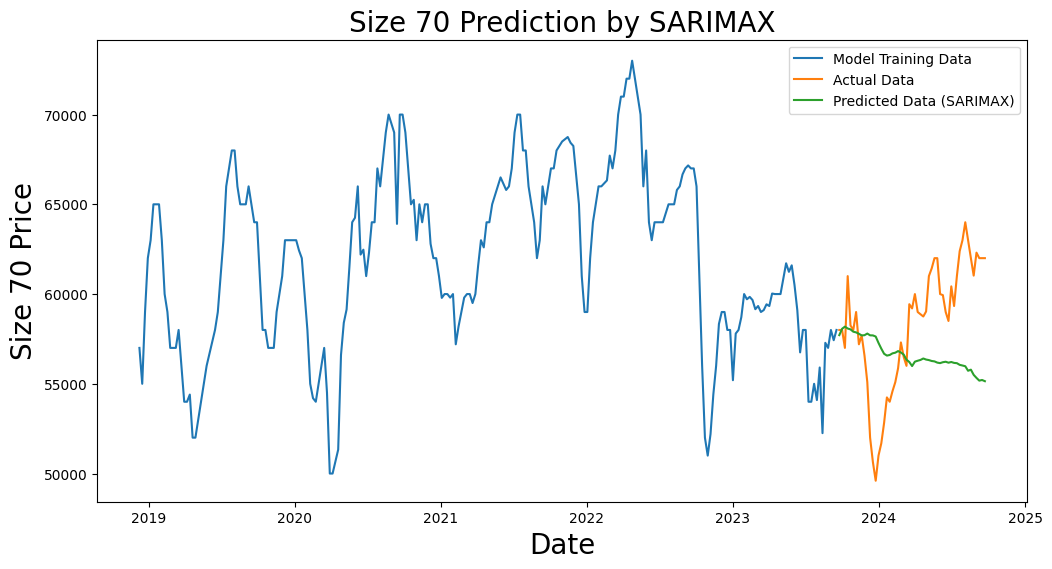

In [40]:
import matplotlib.pyplot as plt

# Plotting the SARIMAX model results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_sar['size_70'], label='Model Training Data')

# Plot actual test data
plt.plot(test_sar['size_70'].index, test_sar['size_70'], label='Actual Data')

# Plot predicted test data
plt.plot(test_sar['size_70'].index, sar_pred_test_reset, label='Predicted Data (SARIMAX)')

# Adding labels, title, and legend
plt.xlabel('Date', size=20)
plt.ylabel('Size 70 Price', size=20)
plt.title('Size 70 Prediction by SARIMAX', size=20)
plt.legend()

# Show plot
plt.show()


Grafik prediksi harga size 70 menggunakan model SARIMA menunjukkan bahwa harga udang mengalami fluktuasi signifikan dengan pola musiman yang jelas dari 2019 hingga 2023. Meskipun model SARIMA mampu menangkap pola harga historis, terdapat penyimpangan dengan data aktual pada 2023, yang menunjukkan adanya faktor-faktor baru yang tidak terprediksi. Prediksi harga untuk 2024 dan seterusnya memperlihatkan tren penurunan harga dengan sedikit fluktuasi. Penyimpangan antara data aktual dan prediksi menunjukkan bahwa model SARIMA mungkin perlu disesuaikan atau dievaluasi ulang, khususnya dengan mempertimbangkan tren terbaru atau faktor eksternal yang belum diakomodasi.

## Saving best model

In [ ]:
with open('model70.pkl','wb') as model70_file:
    pickle.dump(result_model_arima, model70_file)

# Conclusion

Setelah dilakukan Uji Data test dengan penggunaan 2 model ARIMA dan SARIMA maka model yang akan dipilih untuk penggunaan aplikasi UJATIM adalah model ARIMA, ini dikarenakan berdasarkan MAE, RMSE dan MAPE test yang didapat dengan menggunakan Model ARIMA cenderung lebih rendah dibandingkan dengan penggunaan model SARIMA, hal ini juga didukung oleh hasil prediksi dari model arima yang jauh lebih baik dari model SARIMA